In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
from keras import datasets

Matplotlib created a temporary cache directory at /var/folders/4x/9fnhdc910wv8rz7rqbptm_fc0000gn/T/matplotlib-qduw0wmm because the default path (/Users/navyam/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/Users/navyam/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
TRAIN_DIR = 'dataset1/train'
TEST_DIR = 'dataset1/test'
IMAGE_SIZE = 48

In [3]:

train_paths = []
train_labels = []
label_to_index = {}
label_to_index['angry'] = 0
label_to_index['disgust'] = 1
label_to_index['fear'] = 2
label_to_index['happy'] = 3
label_to_index['neutral'] = 4
label_to_index['sad'] = 5
label_to_index['surprise'] = 6

print(os.listdir(TRAIN_DIR))
for label in os.listdir(TRAIN_DIR):
    for img in os.listdir(os.path.join(TRAIN_DIR, label)):
        train_paths.append(os.path.join(TRAIN_DIR, label, img))
        train_labels.append(label_to_index[label])
    print(f'{label}: done')
    

['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']
happy: done
sad: done
fear: done
surprise: done
neutral: done
angry: done
disgust: done


In [4]:

test_paths = []
test_labels = []

for label in os.listdir(TEST_DIR):
    if label == '.DS_Store':
        continue
    for img in os.listdir(os.path.join(TEST_DIR, label)):
        test_paths.append(os.path.join(TEST_DIR, label, img))
        test_labels.append(label_to_index[label])
    print(f'{label}: done')

happy: done
sad: done
fear: done
surprise: done
neutral: done
angry: done
disgust: done


In [5]:
TRAIN_DIR = 'dataset2'
for label in label_to_index.keys():
    for img in os.listdir(os.path.join(TRAIN_DIR, label)):
        train_paths.append(os.path.join(TRAIN_DIR, label, img))
        train_labels.append(label_to_index[label])
    print(f'{label}: done')

angry: done
disgust: done
fear: done
happy: done
neutral: done
sad: done
surprise: done


In [6]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
train_labels.shape, test_labels.shape
print(set(train_labels))
print(set(test_labels))

{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}


In [8]:

# from sklearn.preprocessing import LabelEncoder

# labler = LabelEncoder()
# train_labels = labler.fit_transform(train_labels)
# test_labels = labler.transform(test_labels)
# train_labels.shape, test_labels.shape


# train_images = train_images.reshape(train_images.shape[0],-1)
# test_images = test_images.reshape(test_images.shape[0],-1)

In [7]:
import pandas as pd

class_labels = {v: k for k, v in label_to_index.items()}
print(class_labels)
print(type(class_labels))
d = {}
for i in train_labels:

    if class_labels[i] in d:
        d[class_labels[i]] += 1
    else:
        d[class_labels[i]] = 1
df = pd.DataFrame(d.items(), columns=['class', 'count'])
print(df)
print(sum(d.values()))

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
<class 'dict'>
      class  count
0     happy  12259
1       sad   7921
2      fear   7273
3  surprise   7210
4   neutral  10091
5     angry   7213
6   disgust   2913
54880


In [8]:
train_images = []
for path in tqdm(train_paths):
    img = load_img(path,target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='grayscale')
    img = np.array(img)
    train_images.append(img)
print('Train images loaded and coverted to 48*48 grayscale numpy arrays')

  0%|          | 0/54880 [00:00<?, ?it/s]

Train images loaded and coverted to 48*48 grayscale numpy arrays


In [9]:
test_images = []
for path in tqdm(test_paths):
    img = load_img(path,target_size=(IMAGE_SIZE, IMAGE_SIZE), color_mode='grayscale')
    img = np.array(img)
    test_images.append(img)
print('Test images loaded and coverted to 48*48 grayscale numpy arrays')

  0%|          | 0/7178 [00:00<?, ?it/s]

Test images loaded and coverted to 48*48 grayscale numpy arrays


In [10]:
# ADD noise

def salt_and_pepper(image, amount):
    row, col = image.shape
    s_vs_p = 0.5
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
    out[coords] = 0
    return out

train_labels = list(train_labels)
noiseImages = 70000 - len(train_images)
for i in range(noiseImages):
    idx = np.random.randint(0, len(train_images) - 1)
    img = train_images[idx]
    label = train_labels[idx]
    img = salt_and_pepper(img, 0.2)
    train_images.append(img)
    train_labels.append(label)
train_labels = np.array(train_labels)
print(len(train_images))

70000


In [11]:
train_images = np.array(train_images)
test_images = np.array(test_images)
print(train_images.shape, test_images.shape)
train_labels.shape, test_labels.shape

(70000, 48, 48) (7178, 48, 48)


((70000,), (7178,))

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((70000, 48, 48), (7178, 48, 48), (70000,), (7178,))

In [14]:
import sklearn.model_selection as train_test_split
x_train, x_val, y_train, y_val = train_test_split.train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((56000, 48, 48), (14000, 48, 48), (56000,), (14000,))

In [16]:
from keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=25,validation_data=(x_val, y_val), shuffle=True)
model.save('cnnmodel.h5')

Epoch 1/25
438/438 [==============================] - 118s 269ms/step - loss: 1.7756 - accuracy: 0.2766 - val_loss: 1.5065 - val_accuracy: 0.3954
Epoch 2/25
438/438 [==============================] - 112s 256ms/step - loss: 1.4393 - accuracy: 0.4308 - val_loss: 1.3458 - val_accuracy: 0.4654
Epoch 3/25
438/438 [==============================] - 111s 254ms/step - loss: 1.3376 - accuracy: 0.4728 - val_loss: 1.2962 - val_accuracy: 0.4833
Epoch 4/25
438/438 [==============================] - 112s 255ms/step - loss: 1.2883 - accuracy: 0.4926 - val_loss: 1.2454 - val_accuracy: 0.5056
Epoch 5/25
438/438 [==============================] - 112s 256ms/step - loss: 1.2448 - accuracy: 0.5110 - val_loss: 1.2304 - val_accuracy: 0.5164
Epoch 6/25
438/438 [==============================] - 112s 255ms/step - loss: 1.2170 - accuracy: 0.5241 - val_loss: 1.2210 - val_accuracy: 0.5190
Epoch 7/25
438/438 [==============================] - 111s 254ms/step - loss: 1.1792 - accuracy: 0.5374 - val_loss: 1.2214 -

/Users/navyam/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
import keras
model = keras.models.load_model('cnnmodel.h5')

In [46]:
y_pred = np.array(model.predict(test_images))
print(y_pred.shape)

y_pred = np.argmax(y_pred, axis=1)

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == test_labels[i]:
        accuracy += 1
accuracy = accuracy/len(y_pred)
print(f'accuracy: {accuracy}')

225/225 [==============================] - 6s 26ms/step
(7178, 7)
accuracy: 0.609083310114238


In [30]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

f1 = f1_score(test_labels, y_pred, average='weighted')
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
cm = confusion_matrix(test_labels, y_pred)

print(f'f1: {f1}, accuracy: {accuracy}, precision: {precision}, recall: {recall}, confusion matrix: {cm}')

f1: 0.6067527847860126, accuracy: 0.609083310114238, precision: 0.613825305277826, recall: 0.609083310114238, confusion matrix: [[ 533   23   61   32  126  152   31]
 [  34   49    7    3    4   13    1]
 [ 137    3  332   38  166  232  116]
 [  74    1   36 1416  131   67   49]
 [ 117    5   49   70  765  210   17]
 [ 161    2  107   73  246  634   24]
 [  30    2   53   32   44   27  643]]


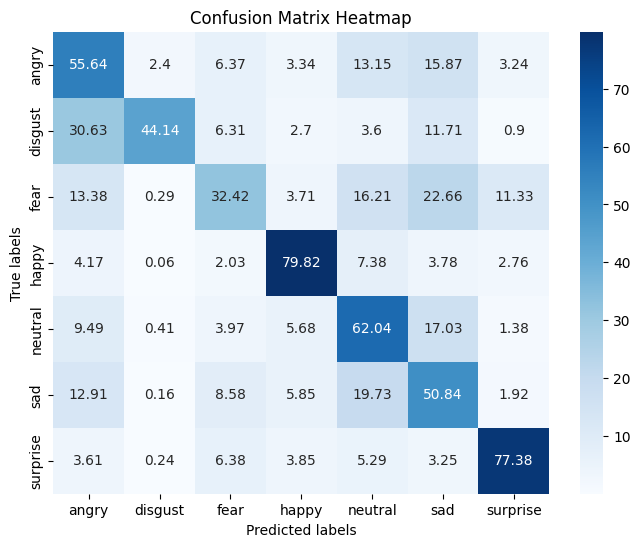

In [42]:
import seaborn as sns
cm = (100.0 * cm / cm.sum(axis=1)[:, np.newaxis]).round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

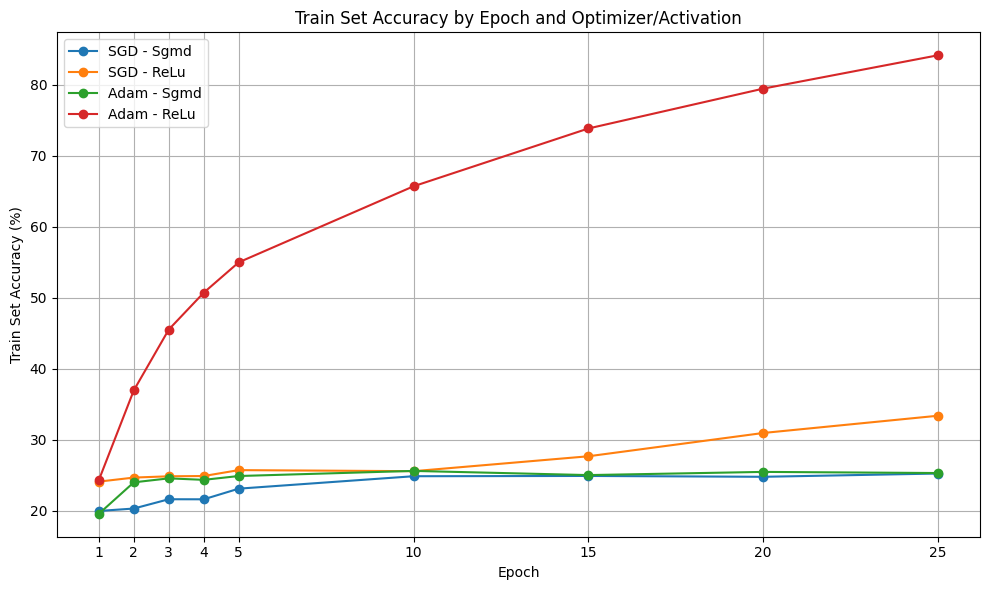

In [43]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4, 5, 10, 15, 20, 25]
sgd_sgmd = [19.96, 20.30, 21.61, 21.60, 23.10, 24.85, 24.89, 24.77, 25.23]
sgd_relu = [24.09, 24.66, 24.84, 24.88, 25.71, 25.56, 27.66, 30.94, 33.37]
adam_sgmd = [19.56, 23.99, 24.55, 24.34, 24.88, 25.60, 25.01, 25.46, 25.30]
adam_relu = [24.31, 36.95, 45.51, 50.70, 54.97, 65.68, 73.82, 79.43, 84.13]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(epochs, sgd_sgmd, marker='o', label='SGD - Sgmd')
plt.plot(epochs, sgd_relu, marker='o', label='SGD - ReLu')
plt.plot(epochs, adam_sgmd, marker='o', label='Adam - Sgmd')
plt.plot(epochs, adam_relu, marker='o', label='Adam - ReLu')

plt.xlabel('Epoch')
plt.ylabel('Train Set Accuracy (%)')
plt.title('Train Set Accuracy by Epoch and Optimizer/Activation')
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
import random
n = random.randint(0, test_images.shape[0]- 1)
image = test_images[n].reshape(IMAGE_SIZE, IMAGE_SIZE, 1)
og_label = class_labels[test_labels[n]]
pre_label = class_labels[model.predict(image.reshape(1, IMAGE_SIZE, IMAGE_SIZE, 1)).argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(f'Original: {og_label}, Predicted: {pre_label}')
plt.show()


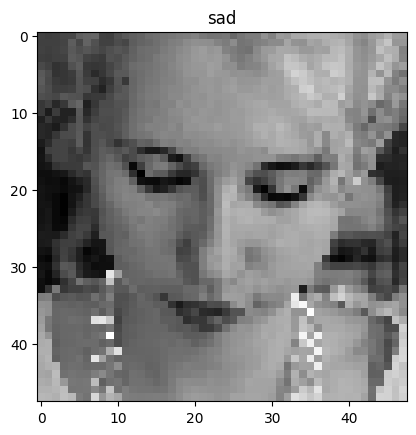

In [16]:
import random
n = random.randint(0, train_images.shape[0])
image = train_images[n].reshape(IMAGE_SIZE, IMAGE_SIZE)
# print(image)
label = class_labels[train_labels[n]]
plt.imshow(image, cmap='gray')
plt.title(label)
plt.show()

In [17]:
import sklearn.model_selection as train_test_split
x_train, x_val, y_train, y_val = train_test_split.train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((56000, 48, 48), (14000, 48, 48), (56000,), (14000,))

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

num_samples = train_images.shape[0]
num_features = np.prod(train_images.shape[1:])
train_images_1d = train_images.reshape(num_samples, num_features)


x_lda  = lda.fit_transform(train_images_1d, train_labels)

In [19]:
x_lda.shape

(70000, 6)

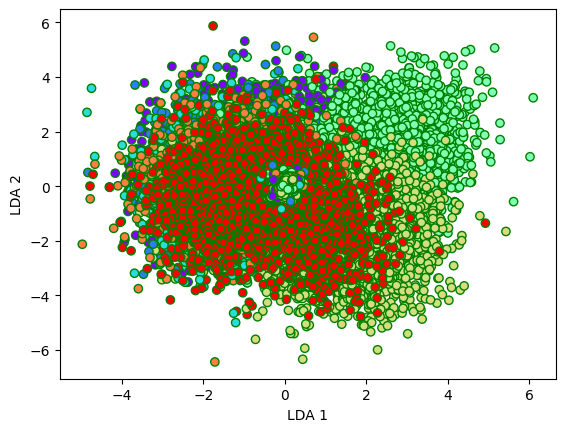

In [21]:
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.scatter(x_lda[:,0], x_lda[:,1], c=train_labels, cmap='rainbow', edgecolors='g')

In [24]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X = pca.fit_transform(train_images_1d)

num_samples = test_images.shape[0]
num_features = np.prod(test_images.shape[1:])
test_images_1d = test_images.reshape(num_samples, num_features)

Xt = pca.transform(test_images_1d)
X.shape


(70000, 189)

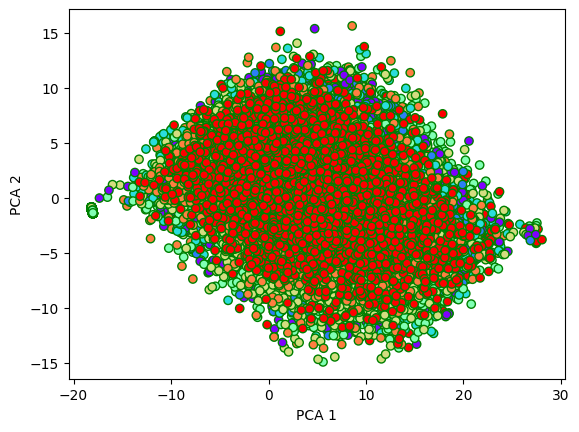

In [25]:
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.scatter(X[:,0], X[:,1], c=train_labels, cmap='rainbow', edgecolors='g')

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
model = AdaModel.fit(X,train_labels)
y_pred = model.predict(Xt)
print('Accuracy of AdaBoost Classifier on test set: {:.2f}'.format(model.score(Xt, test_labels)))
cm = confusion_matrix(test_labels, y_pred)
print(cm)

/Users/navyam/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Classifier on test set: 0.29
[[  45    0   27  625  132   76   53]
 [   4    0    6   80   11    8    2]
 [  44    0   42  602  179   71   86]
 [  52    0   22 1453  133   72   42]
 [  29    0   37  792  238   92   45]
 [  32    0   25  757  272  136   25]
 [  17    0   38  397  167   36  176]]


In [27]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=100)
model = RFModel.fit(X,train_labels)
y_pred = model.predict(Xt)
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(model.score(Xt, test_labels)))

Accuracy of Random Forest Classifier on test set: 0.40


In [29]:
model = RFModel.fit(x_lda,train_labels)
y_pred = model.predict(x_lda)
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(model.score(lda.transform(test_images_1d), test_labels)))

Accuracy of Random Forest Classifier on test set: 0.35


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GBModel = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
model = GBModel.fit(X,train_labels)
y_pred = model.predict(Xt)
print('Accuracy of Gradient Boosting Classifier on test set: {:.2f}'.format(model.score(Xt, test_labels)))

Accuracy of Gradient Boosting Classifier on test set: 0.29


In [31]:
from sklearn.ensemble import BaggingClassifier
BagModel = BaggingClassifier(n_estimators=100)
model = BagModel.fit(X,train_labels)
y_pred = model.predict(Xt)
print('Accuracy of Bagging Classifier on test set: {:.2f}'.format(model.score(Xt, test_labels)))

Accuracy of Bagging Classifier on test set: 0.40


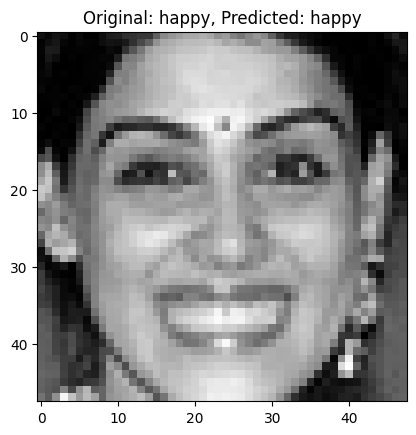

In [32]:
n = random.randint(0, test_images.shape[0]- 1)
image = test_images[n].reshape(IMAGE_SIZE, IMAGE_SIZE, 1)
og_label = class_labels[test_labels[n]]
pre_label = class_labels[y_pred[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(f'Original: {og_label}, Predicted: {pre_label}')
plt.show()


In [34]:
model = BagModel.fit(x_lda,train_labels)
y_pred = model.predict(x_lda)
print('Accuracy of Bagging Classifier on test set: {:.2f}'.format(model.score(lda.transform(test_images_1d), test_labels)))

Accuracy of Bagging Classifier on test set: 0.35


In [ ]:
# feature scaling

In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors=10)
model = KNNModel.fit(X,train_labels)
y_pred = model.predict(Xt)
print('Accuracy of K-Nearest Neighbors Classifier on test set: {:.2f}'.format(model.score(Xt, test_labels)))

Accuracy of K-Nearest Neighbors Classifier on test set: 0.32


In [36]:
model = KNNModel.fit(x_lda,train_labels)
y_pred = model.predict(x_lda)
print('Accuracy of K-Nearest Neighbors Classifier on test set: {:.2f}'.format(model.score(lda.transform(test_images_1d), test_labels)))

Accuracy of K-Nearest Neighbors Classifier on test set: 0.29


In [37]:
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier()
model = DTModel.fit(X,train_labels)
y_pred = model.predict(Xt)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(model.score(Xt, test_labels)))

Accuracy of Decision Tree Classifier on test set: 0.27


In [38]:
model = DTModel.fit(x_lda,train_labels)
y_pred = model.predict(x_lda)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(model.score(lda.transform(test_images_1d), test_labels)))

Accuracy of Decision Tree Classifier on test set: 0.29
